In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('dt3.csv')
df['Gia']=df['Gia'].replace('[*₫Giá dự kiến: .]','',regex=True)
df['Gia']=pd.to_numeric(df['Gia']).astype(int)
df=df.dropna(axis=0,how='any')


Task: Tính doanh thu của từng nhà sản xuất, vẽ biểu đồ, thương hiệu nào bán chạy nhất kể từ khi ra mắt

Product has most sales is iPhone with 54650754000 sales


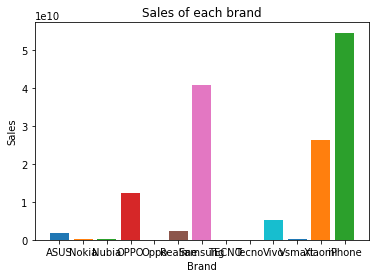

In [2]:
import numpy as np
import matplotlib.pyplot as plt
df1=df
df1['Sales']=df['Gia']*df['So Luong']
df1.head()
sale_values=df1.groupby('Brand').sum()['Sales']
sale_values
for i,y in sale_values.items():
    plt.bar(i,y)
    plt.xlabel('Brand')
    plt.ylabel('Sales')
    plt.title('Sales of each brand')
    if y==sale_values.max():
        print('Product has most sales is',i,'with',y,'sales')



Task: Tìm những chiếc điện thoại bán chạy và được đánh giá cao trong tầm giá 8 triệu đồng, trong đó điện thoại nào bán được nhiều nhất

In [13]:
df2=df
df2_tmp=df2.loc[(df2['Gia']<8000000)&(df2['Danh gia']>=4)&(df2['Gia']>5000000)]
most_brn=df2_tmp.loc[:,['Name','Brand','Gia','Danh gia','So Luong','Tên cửa hàng','Link']]

most_brn.sort_values(by='So Luong',ascending=False,inplace=True)
most_brn




,Name,Brand,Gia,Danh gia,So Luong,Tên cửa hàng,Link
47,Điện thoại OPPO A95,OPPO,6990000,4.0,263,Thế giới đi động,https://www.thegioididong.com/dtdd/oppo-a95-4g...
40,Điện thoại OPPO Reno4 Pro,OPPO,7990000,4.1,143,Thế giới đi động,https://www.thegioididong.com/dtdd/oppo-reno4-...
51,Điện thoại Xiaomi Redmi Note 10S 6GB,Xiaomi,5990000,4.0,121,Thế giới đi động,https://www.thegioididong.com/dtdd/xiaomi-redm...
152,Xiaomi Mi 11 Lite 5G,Xiaomi,7490000,4.6,107,Cellphones,https://cellphones.com.vn/xiaomi-mi-11-lite.html
210,Xiaomi Redmi Note 10 Pro 8GB,Xiaomi,7300000,4.7,52,Cellphones,https://cellphones.com.vn/xiaomi-redmi-note-10...
183,Xiaomi Redmi Note 10,Xiaomi,5100000,4.7,51,Cellphones,https://cellphones.com.vn/xiaomi-redmi-note-10...
50,Điện thoại OPPO A76,OPPO,5990000,4.3,47,Thế giới đi động,https://www.thegioididong.com/dtdd/oppo-a76-4g...
171,Samsung Galaxy A71,Samsung,7700000,4.8,36,Cellphones,https://cellphones.com.vn/samsung-galaxy-a71.html
46,Điện thoại Vivo Y33s,Vivo,6990000,4.1,32,Thế giới đi động,https://www.thegioididong.com/dtdd/vivo-y33s?s...
217,OPPO Reno5,OPPO,7790000,4.8,26,Cellphones,https://cellphones.com.vn/oppo-reno-5.html


Product has most quanity is Điện thoại OPPO A95 with 263 sales


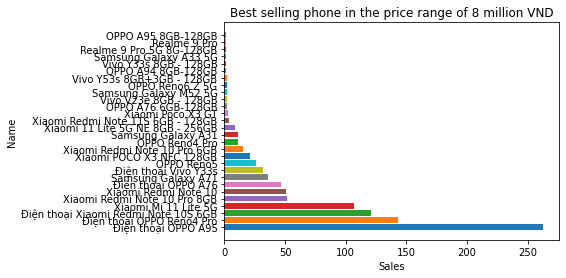

In [4]:
tm_mst=most_brn.groupby('Name').max()['So Luong'].sort_values(ascending=False)

for i, y in tm_mst.items():
    plt.barh(i,y)
    plt.ylabel('Name')
    plt.xlabel('Sales')
    plt.title('Best selling phone in the price range of 8 million VND')
    if y==tm_mst.max():
        print('Product has most quanity is',i,'with',y,'sales')

Task: Tìm những chiếc điện thoại có sử dụng chip Snapdragon, đánh giá xem những chiếc điện thoại sử dụng chip Snap có đem lại tiềm năng không?

In [5]:
def chip_snd(st1):
    st1=st1.split(' ')[0]
    return st1

In [6]:



df.head()
df3=df.loc[:,['Name','Chip','Danh gia']]
df3['Chip Sn']=df3['Chip'].apply(chip_snd)
snd_tmp=df3.loc[(df3['Chip Sn']=='Snapdragon')]
snd_tmp2=snd_tmp.groupby('Chip')
snd_tmp2_avg=snd_tmp2.mean()
snd_tmp2_avg=round(snd_tmp2_avg.reset_index(),1)
snd_tmp2_avg
    




,Chip,Danh gia
0,Snapdragon 480 8 nhân 5G,4.0
1,Snapdragon 662,4.5
2,Snapdragon 678 (11 nm),4.7
3,Snapdragon 680,5.0
4,Snapdragon 680 8 nhân,4.1
5,Snapdragon 695 5G,5.0
6,Snapdragon 695 5G 8 nhân,4.0
7,Snapdragon 720G,3.4
8,Snapdragon 720G (8 nm),4.6
9,Snapdragon 730,3.2


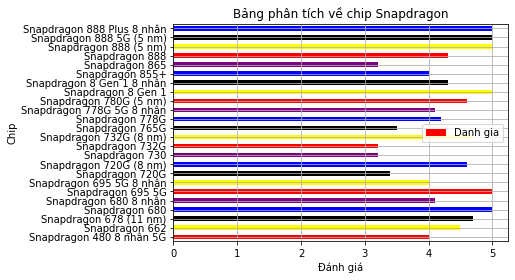

In [7]:

c = ['red', 'yellow', 'black', 'blue', 'purple']

snd_tmp2_avg.plot(x='Chip',y='Danh gia',kind='barh',color=c)
plt.title('Bảng phân tích về chip Snapdragon')
plt.xlabel('Đánh giá')
plt.grid()
plt.show()

Task: Những sản phẩm nào bán được nhiều nhất, đưa ra giả thuyết.

C:\Users\Admin\AppData\Local\Temp\ipykernel_7284\394737854.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df4_tmp['Name'],rotation=90)


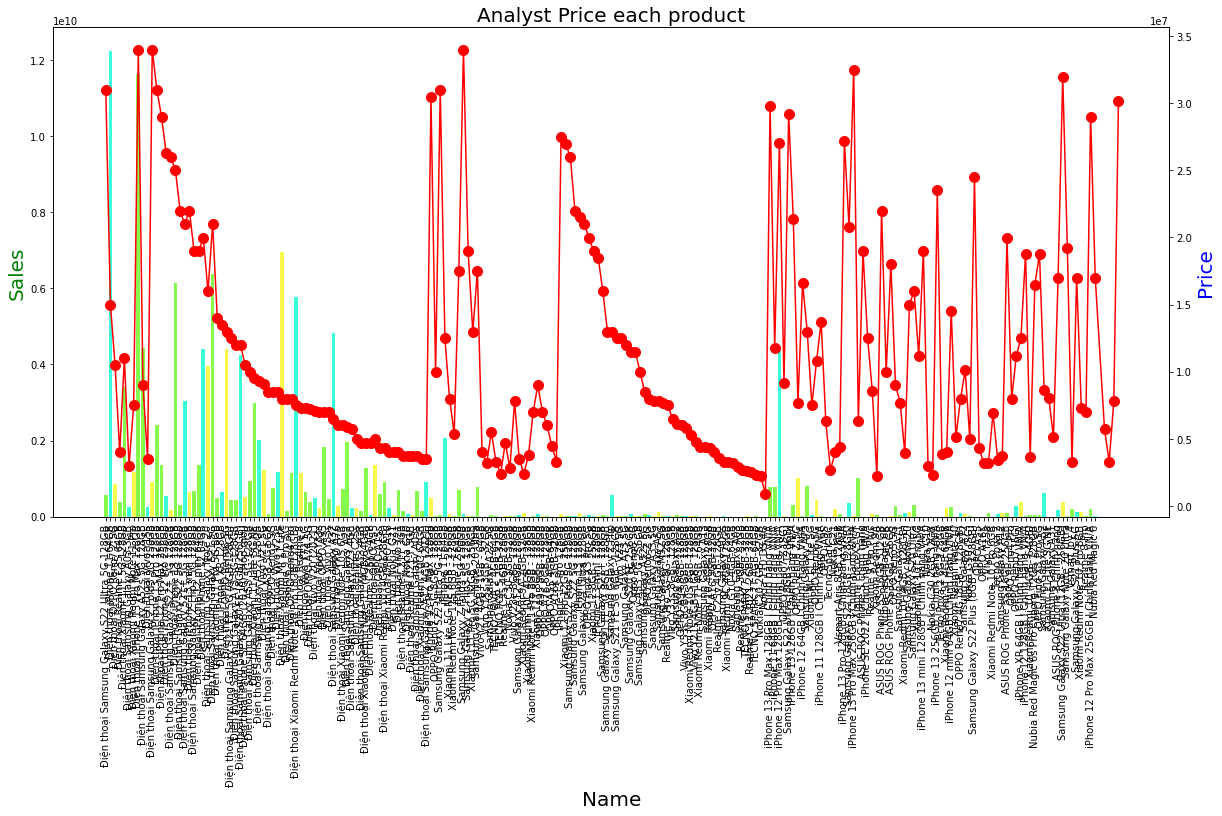

In [8]:
df4=df
df4['Sales']=df4['Gia']*df4['So Luong']
df4_tmp=df4.loc[:,['Name','Gia','Sales']]

c=['#85fd4d','#3afdda','#f9f94d','#85f94d']
plt.figure(figsize=(20,9))
ax1=plt.subplot()
ax1.bar(df4_tmp['Name'],df4_tmp['Sales'],color=c)
ax2=ax1.twinx()


ax1.set_xlabel('Name',fontsize=20)
ax2.plot(df4_tmp['Gia'],color='red',marker='.',markersize=20)
ax2.set_ylabel('Price',color='blue',fontsize=20)
ax1.set_ylabel('Sales',color='green',fontsize=20)
ax1.set_xticklabels(df4_tmp['Name'],rotation=90)
plt.title('Analyst Price each product',fontsize=20)
plt.show()

In [9]:
import pandas as pd
pth = 'Du_lieu_dt_5.csv'
df = pd.read_csv(pth)
pd.unique(df["Chip"])

col_list = ['Processors','Rank']
df_rank = pd.read_csv('Smartphone-Processors-Rating.csv', usecols=col_list,index_col=0,squeeze=True)
rank_dict = df_rank.to_dict()

chip_column = df["Chip"]
price_column = df["Gia"]

xep_hang = []

for i in range(len(df)):
    chip_rank = chip_column[i]
    phone_price = ((price_column[i]).replace(".",""))[:-2]
    phone_price = phone_price.replace("Giá dự kiến: ","")
    rank = rank_dict.get(chip_rank)
    if rank == None:
        rank = 0
    result = rank * int(phone_price) 
    #print(result)
    
    xep_hang.append(result)

df['Hieu nang / Gia'] = xep_hang

#df2 = df2.loc[df2['Gia'] < 10000000]
df2['Gia']=df['Gia'].replace('[*₫Giá dự kiến: .]','',regex=True)
#df3 = df2.loc[df2['Gia'] < 10000000]
df2 = = df2.loc[df2['Gia'] < 10000000]

#(df3.sort_values(['Hieu nang / Gia'])).head(5)


SyntaxError: invalid syntax (3500891296.py, line 32)